In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("Algerian_forest_fires__cleaned_dataset.csv")
df.drop(['day','month','year'],axis=1,inplace=True)

In [4]:
df['Classes']=np.where(df['Classes'].str.contains('not fire'),0,1)

In [5]:
df['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [6]:
#Independent and dependent features
X=df.drop('FWI',axis=1)
y=df['FWI']

In [16]:
#train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.25,random_state=42)

In [17]:
#feature selection basedon corr
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.554755,-0.324112,-0.379870,0.743910,0.599414,0.455433,0.700603,0.562107,0.655576,0.324594
RH,-0.554755,1.000000,0.418173,0.186281,-0.607641,-0.276259,-0.080179,-0.636500,-0.210007,-0.363471,-0.540757
Ws,-0.324112,0.418173,1.000000,0.215535,-0.278513,-0.167514,-0.015666,-0.331193,-0.114361,-0.224573,-0.300060
Rain,-0.379870,0.186281,0.215535,1.000000,-0.602596,-0.366534,-0.397206,-0.439679,-0.385545,-0.457398,-0.065942
FFMC,0.743910,-0.607641,-0.278513,-0.602596,1.000000,0.653218,0.561035,0.779464,0.640905,0.774792,0.289907
DMC,0.599414,-0.276259,-0.167514,-0.366534,0.653218,1.000000,0.891554,0.650570,0.985115,0.692633,0.242696
DC,0.455433,-0.080179,-0.015666,-0.397206,0.561035,0.891554,1.000000,0.485631,0.953268,0.654831,-0.039733
ISI,0.700603,-0.636500,-0.331193,-0.439679,0.779464,0.650570,0.485631,1.000000,0.604646,0.763974,0.303519
BUI,0.562107,-0.210007,-0.114361,-0.385545,0.640905,0.985115,0.953268,0.604646,1.000000,0.698935,0.139437
Classes,0.655576,-0.363471,-0.224573,-0.457398,0.774792,0.692633,0.654831,0.763974,0.698935,1.000000,0.199110


<Axes: >

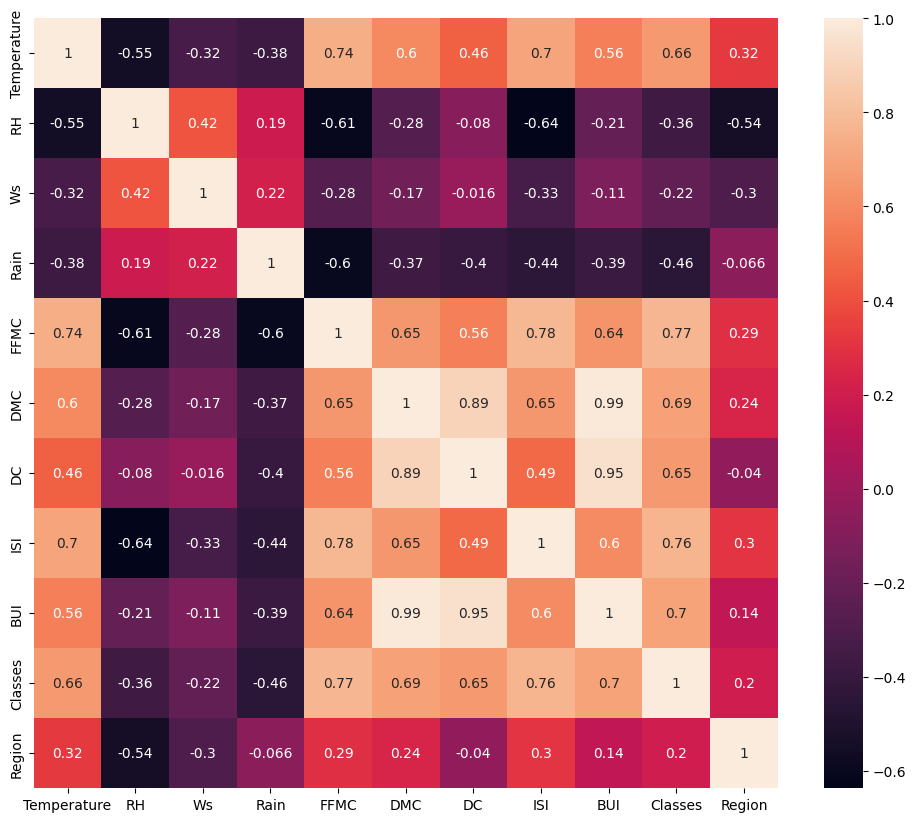

In [18]:
#check for multicollinearity
plt.figure(figsize=(12,10))
corr=X_train.corr()
sns.heatmap(corr,annot=True)

In [19]:
def correlation(dataset, threshold):
    col_corr=set()
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                col_name=corr_matrix.columns[i]
                col_corr.add(col_name)
    return col_corr

corr_features=correlation(X_train,0.85)

In [20]:
#drop if corr is above 0.85
X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)

In [21]:
#Feature scaling or standardization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Text(0.5, 1.0, 'X_train After scaling')

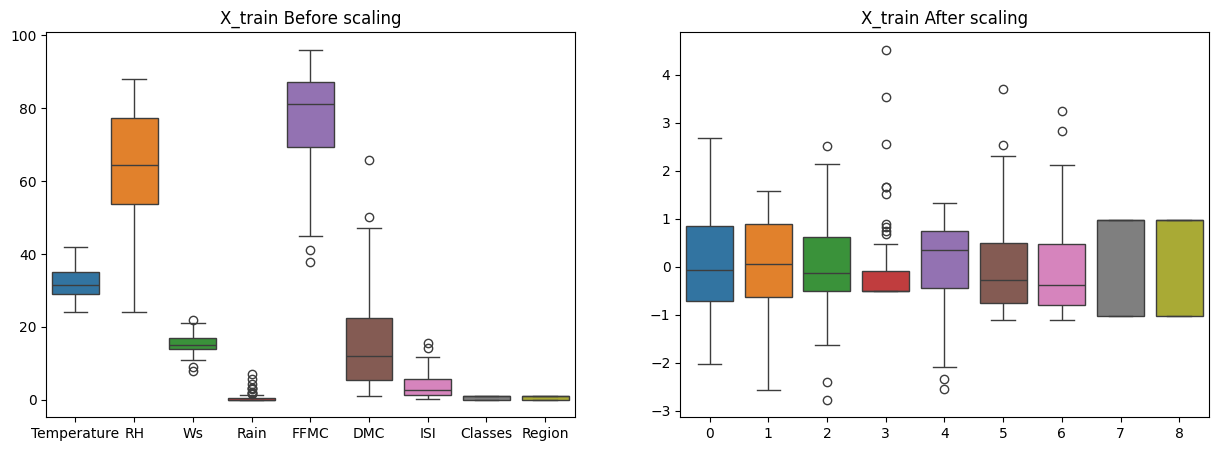

In [22]:
#box plot to undersand effect of standarscaler
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title('X_train Before scaling')
plt.subplot(1,2,2)
sns.boxplot(data=X_train_scaled)
plt.title('X_train After scaling')


### Linear Regression model

MAE 0.756682283006359
R2_SCORE 0.9617739416141229


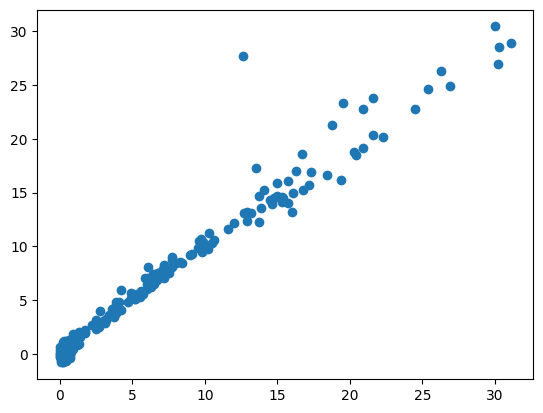

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
linreg=LinearRegression()
linreg.fit(X_train_scaled,y_train)
y_pred=linreg.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print('MAE', mae)
print('R2_SCORE', score)
plt.scatter(y_test,y_pred) ###is linear

MAE 1.3741197412202304
R2_SCORE 0.9294849243569611


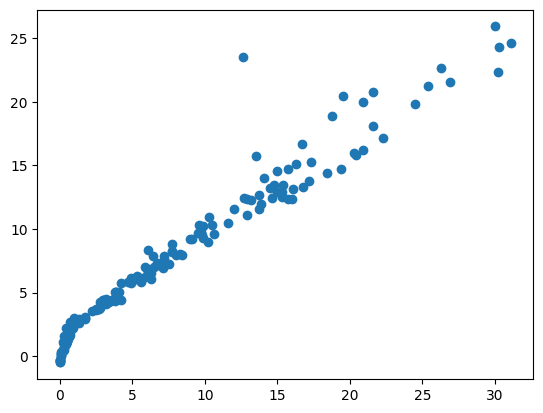

In [28]:
#Lasso Regression

from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
lasso=Lasso()
lasso.fit(X_train_scaled,y_train)
y_pred=lasso.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print('MAE', mae)
print('R2_SCORE', score)
plt.scatter(y_test,y_pred)

MAE 0.7995456274793661
R2_SCORE 0.9626390285394024


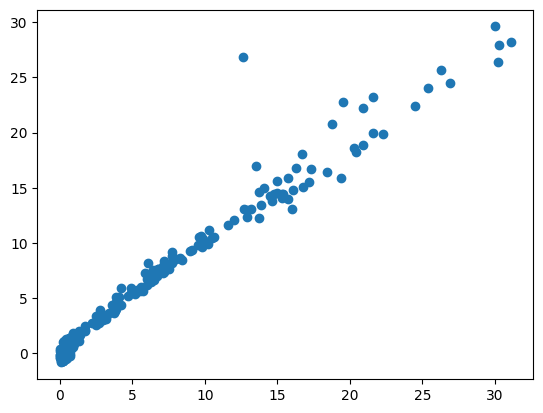

In [29]:
#Ridge regression model

from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
Ridge=Ridge()
Ridge.fit(X_train_scaled,y_train)
y_pred=Ridge.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print('MAE', mae)
print('R2_SCORE', score)
plt.scatter(y_test,y_pred)

MAE 2.1696686685099977
R2_SCORE 0.8464109923872387


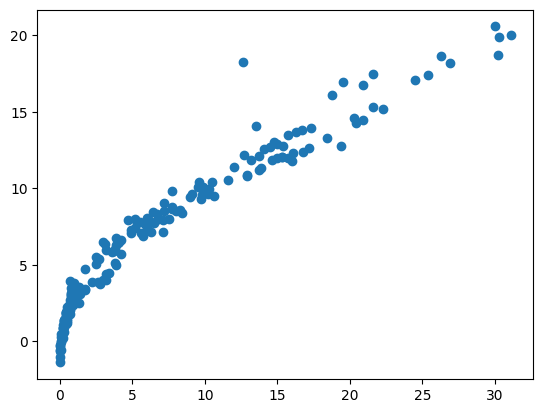

In [30]:
#ElasticNet regression model

from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
ElasticNet=ElasticNet()
ElasticNet.fit(X_train_scaled,y_train)
y_pred=ElasticNet.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print('MAE', mae)
print('R2_SCORE', score)
plt.scatter(y_test,y_pred)